# 李雅普诺夫函数（Lyapunov function）

李雅普诺夫函数是一个可以证明常微分方程平衡解稳定性的标量函数。

记 
$$
V(\mathbf x) : \mathbb R^n \to \mathbb R
$$
是一个连续的标量函数。当 $V(\mathbf x)$ 满足下面条件时， 

$$
V(\mathbf 0) = 0,\quad  V(\mathbf x) > 0\, \forall \mathbf x\in U\backslash \{0\}
$$

我们称 $V(\mathbf x)$ 是一个**李雅普诺夫函数**，

考察非线性驻定微分方程组
$$
\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf f(\mathbf x)
$$

假定 
1. $\mathbf f(\mathbf 0) = 0$。
2. $\mathbf f(\mathbf x)$ 在区域 $G：\|\mathbf x\| \leq A$ 有连续的偏导数。

易知 $\mathbf x^* = 0 $ 是上述到驻定方程的平衡解（驻定解，常数解）.

记 $\mathbf x(t)$ 为驻定方程的一个解， 则 $V(\mathbf x(t))$ 通过非线性微分方程组 $\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf f(\mathbf x)$关于时间的导数(全导数)计算如下 
$$
\frac{\mathrm d }{\mathrm d t}V(\mathbf x(t)) = \sum_{i=1}^n \frac{\partial }{\partial x_i} V(\mathbf x(t))\mathbf f_i(\mathbf x) = \nabla V\cdot\mathbf f(\mathbf x)
$$

** 稳定平衡定理：** 如果 $V$ 是局部定正的(positive definite)， 但是 $V$ 关于时间的导数是局部常负的(negative semidefinite)

$$
\frac{\mathrm d }{\mathrm d t}V(\mathbf x(t)) \leq 0\, \forall \mathbf x \in \mathcal B\backslash \{0\}
$$
则驻定方程的零解是稳定的。


** 局部渐近稳定平衡定理** 如果 $V$ 是局部定正的(positive definite)， 但是 $V$ 关于时间的导数是局部 常负的(negative definite)

$$
\frac{\mathrm d }{\mathrm d t}V(\mathbf x(t)) < 0\, \forall \mathbf x \in \mathcal B\backslash \{0\}
$$
则驻定方程的零解是渐近稳定的。

**全局渐近稳定平衡定理** 如果 $V$ 是全局定正的(positive definite)， 并且是径向无界的(radially unbounded)，即
$$
\|\mathbf x\|\to \infty \Rightarrow V(\mathbf x)\to \infty 
$$

但是 $V$ 关于时间的导数是全局常负的(negative definite)

$$
\frac{\mathrm d }{\mathrm d t}V(\mathbf x(t)) < 0\, \forall \mathbf x \in \mathbb R^n\backslash \{0\}
$$
则驻定方程的零解是全局渐近稳定的。

**例子**   
$$
\frac{\mathrm d x}{\mathrm d t} = - x,\, x\in \mathbb R
$$

取函数 $V=|x|$ on $\mathbb R\backslash\{0\}$, 有
$$
\frac{\mathrm d }{\mathrm d t}V(\mathbf x(t)) = sgn(x)\cdot(-x)=-|x|<0.
$$

易知上述方程关于原点是渐近稳定的， 同样也是全局渐近稳定的。

![](./figures/ppp.png)

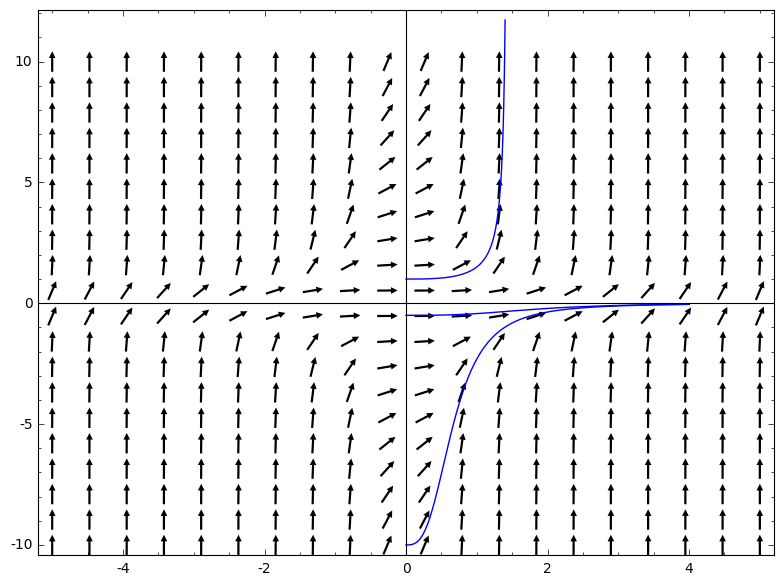

In [2]:
x,y=var('x, y')
v=plot_slope_field(x^2*y^2,(x,-5,5),(y,-10,10),headaxislength=3, headlength=3)
a=6
b=-3
c=0.3
d1=plot(-3/(x^3+a),(x,0,4))
d2=plot(-3/(x^3+b),(x,0,1.4))
d3=plot(-3/(x^3+c),(x,0,4))
show(v+d1+d2+d3)

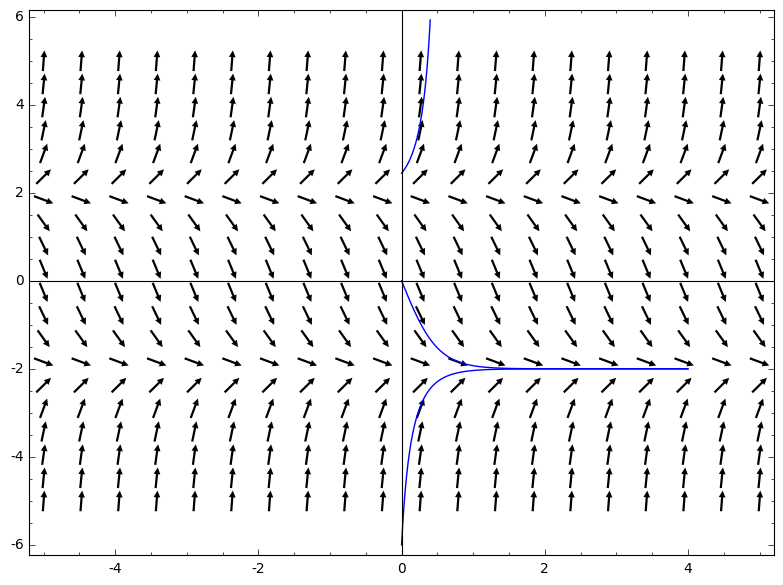

In [3]:
x,y=var('x,y')
v=plot_slope_field((y^2-4),(x,-5,5),(y,-5,5),headaxislength=3, headlength=3)
a=2
b=-1
c=0.1
d1=plot(2*(1+a*e^(4*x))/(1-a*e^(4*x)),(x,0,4))
d2=plot(2*(1+b*e^(4*x))/(1-b*e^(4*x)),(x,0,4))
d3=plot(2*(1+c*e^(4*x))/(1-c*e^(4*x)),(x,0,0.4))
show(v+d1+d2+d3)

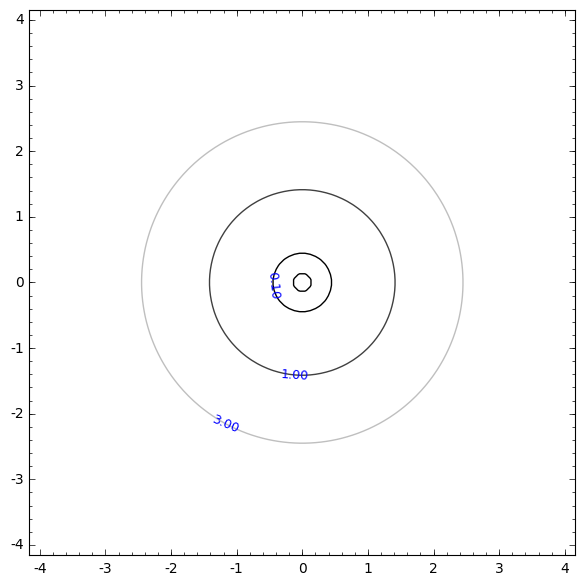

In [9]:
a = -1
x,y = var('x,y')
cp = contour_plot((x^2 + y^2)/2, (x,-4,4), (y,-4,4), fill=False, contours=[0.01, 0.1, 1, 3], labels=True)
show(cp)

In [5]:
maxima('plotdf([-y+(-1)*x**3,x+(-1)*y**3],[x,y],[x,-2,2],[y,-2, 2])')

"/home/why/maxout.xmaxima"

In [15]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
x,y = var('x,y')
from sage.ext.fast_eval import fast_float
@interact
def _(f = input_box(default=y), g=input_box(default=-x*y+x^3-x),
      xmin=input_box(default=-1), xmax=input_box(default=1),
      ymin=input_box(default=-1), ymax=input_box(default=1),
      start_x=input_box(default=0.5), start_y=input_box(default=0.5),
      step_size=(0.01,(0.001, 0.2)), steps=(600,(0, 1400)) ):
    ff = fast_float(f, 'x', 'y')
    gg = fast_float(g, 'x', 'y')
    steps = int(steps)

    points = [ (start_x, start_y) ]
    for i in range(steps):
        xx, yy = points[-1]
        try:
            points.append( (xx + step_size * ff(xx,yy), yy + step_size * gg(xx,yy)) )
        except (ValueError, ArithmeticError, TypeError):
            break

    starting_point = point(points[0], pointsize=50)
    solution = line(points)
    vector_field = plot_vector_field( (f,g), (x,xmin,xmax), (y,ymin,ymax) )

    result = vector_field + starting_point + solution

    pretty_print(html(r"$\displaystyle\frac{dx}{dt} = %s$  $ \displaystyle\frac{dy}{dt} = %s$" % (latex(f),latex(g))))
    result.show(xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax)

NameError: name 'input_box' is not defined

## 6.2.2 二次型 $V$ 函数 的构造 

**定理 4** 如果驻定非线性微分方程组
$$
\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf f(\mathbf x)
$$
1. 如果一个定正的函数 $V(\mathbf x)$, 使其通过上述微分方程组的全导数 
$
\frac{\mathrm d V}{\mathrm d t} 
$
为**常负函数**或**恒等于零**，则上述微分方程的零解是**稳定的**。 
1. 如果有定正函数 $V(\mathbf x)$, 使其通过上述微分方程的全导数
$
\frac{\mathrm d V}{\mathrm d t} 
$
为定负的， 则上述方程的零解是**渐近稳定**的。
1. 如果存在函数 $V(\mathbf x)$ 和某非负常数 $\mu$, 使其通过上述微分方程的全导数为
$$
\frac{\mathrm d V}{\mathrm d t} = \mu V + W(\mathbf x)
$$
且当 $\mu=0$, $W(\mathbf x)$ 这定正函数;当 $\mu\not = 0$, $W(\mathbf x)$ 为常正函数或恒等于零， 而且在 $\mathbf x = 0$ 的任意小领域内至少存在某个 $\mathbf x_0$, 使得 $V(\mathbf x_0) > 0$， 则上述微分方程组的零解是**不稳定的**。

** 定理 6 ** 如果一阶线性微分方程组
$$
\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A\mathbf x
$$
的特征根 $\lambda_i$ 均不满足关系式
$$
\lambda_i + \lambda_j = 0, \quad i, j = 1, 2, \cdots, n.
$$
则对任何的负定（或正定）的对称矩阵 $\mathbf C$, 均有唯一的二次型

$$
V(\mathbf x) = \mathbf x^T\mathbf B \mathbf x\quad (\mathbf B^T = \mathbf B)
$$

使其通过一阶线性微分方程组的全导数有
$$
\frac{\mathrm d V}{\mathrm d t} = \mathbf x^T\mathbf C\mathbf x\quad (\mathbf C^T = \mathbf C),
$$
且对矩阵 $\mathbf B$ 满足关系式 

$$
\mathbf A^T \mathbf B + \mathbf B\mathbf A = \mathbf C,
$$ 

1. 如果一阶方程组的特征根均是**负实部**， 则二次型 $V(\mathbf x) = \mathbf x^T\mathbf B \mathbf x$ 是正定（或负定）的;
1. 如果一阶方程组的有正实部的特征根， 则二次型 $V(\mathbf x) = \mathbf x^T\mathbf B \mathbf x$ 不是常正（或常负）的。

### 利用定理 6 的结论来证明定理 2 

下面考虑非线性微分方程组
$$
\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x + \mathbf R(\mathbf x),
$$
其中 $\mathbf R(\mathbf 0) = 0$， 且满足条件

$$
\frac{\| \mathbf R(\mathbf x)\|}{\|\mathbf x\|}\xrightarrow{\|\mathbf x\|\rightarrow 0} 0 
$$

** 定理 2 （按线性近似决定稳定性问题）** 
当一阶线性微分方程组 $\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x$ 的没有 0 或 0 实部的特征根， 则非线性微分方程组 $\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x + \mathbf R(\mathbf x)$ 的 $\mathbf 0$ 解的稳定性态与线性近似方程组 $\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x$ 的 $\mathbf 0$ 解的稳定性态一致， 即：
1. 如果 $\mathbf A$ 的特征值的实部都是负的，方程组的零解是渐近稳定的。
2. 如果 $\mathbf A$ 的存在正实部特征值，则方程方程组的零解是不稳定的。

**分析：** 关键是找一个二次型，讨论它关于我们关心的方程组的全导数的性质。定理 6 给了我们一种找到二次型的方法。

**证明：** 如果 $\mathbf A$ 的任一特征值 $\lambda_i$ 满足

$$
\lambda_i + \lambda_j \not= 0, \quad i, j = 1, 2, \cdots, n.
$$

则可取矩阵 $\mathbf C$ 为任一负对称矩阵， 例如可取负单位矩阵 $-\mathbf E$, 则根据定理 6， 存在二次型

$$
V(\mathbf x) = \mathbf x^T\mathbf B \mathbf x\quad (\mathbf B^T = \mathbf B)
$$


$V$ 通过

$$
\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x + \mathbf R(\mathbf x),
$$

全导数为

$$
\frac{\mathrm d V(\mathbf x)}{\mathrm d t} =(\mathbf x^T\mathbf A^T + \mathbf R^T(\mathbf x))\mathbf B\mathbf x + \mathbf x^T\mathbf B (\mathbf A\mathbf x + \mathbf R(\mathbf x))=-\mathbf x^T\mathbf x + 2\mathbf x^TB\mathbf R(\mathbf x).
$$

因为 $\mathbf R(\mathbf x)$ 收敛于 $\mathbf 0$ 的速度比 $\mathbf x$ 快， 只要取原点 $\mathbf 0$ 附近足够小的邻域，便可使在此域内有

$$
|\mathbf x^T BR(\mathbf x)|< \frac{1}{4}\mathbf x^T \mathbf x
$$

$$
\frac{\mathrm d V(\mathbf x)}{\mathrm d t} < -\frac{1}{2}\mathbf x^T\mathbf x
$$
即二次型 $V(\mathbf x) = \mathbf x^T\mathbf B \mathbf x$ 通过 $\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x + \mathbf R(\mathbf x)$ 的全导数是定负的。

下面证明第一个结论，如果 $\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x$ 的特征根均具有负实部时， 再有定理 6 的结论，可知：
1. $\lambda_i + \lambda_j\not=0$. 
2. 二次型$V(\mathbf x) = \mathbf x^T\mathbf B \mathbf x$ 是定正的。
3. $V(\mathbf x)$ 通过非线性方程 $\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x + \mathbf R(\mathbf x)$ 的全导数为定负的。

因而， 方程 
$$
\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x + \mathbf R(\mathbf x)
$$
的零解是渐近稳定的。 

下面证明结论 2, 如果 $\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x$ 具有正实部的特征根， 考虑如下线性方程组
$$
\frac{\mathrm d \mathbf x}{\mathrm d t} = (\mathbf A -\frac{\mu}{2}\mathbf E) \mathbf x 
$$
其中 $\mu$ 为适当小的正实数， 使得
1. 上述方程仍有正实部的特征根，
1. 任意两个特征根之和不为零，

则对于任意定正对称矩阵， 如 $\mathbf E$, 存在不是**常负**的对称矩阵 $\mathbf B$ 满足如下关系式

$$
(\mathbf A -\frac{\mu}{2}\mathbf E)^T\mathbf B + \mathbf B (\mathbf A -\frac{\mu}{2}\mathbf E) = E
$$

$$
\mathbf A^T \mathbf B + \mathbf B\mathbf A = \mu \mathbf B + \mathbf E.
$$

这样二次型$V(\mathbf x) = \mathbf x^T\mathbf B \mathbf x$ 通过 $\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x + \mathbf R(\mathbf x)$ 的全导数有
$$
\frac{\mathrm d V(\mathbf x)}{\mathrm d t} =(\mathbf x^T\mathbf A^T + \mathbf R^T(\mathbf x))\mathbf B\mathbf x + \mathbf x^T\mathbf B (\mathbf A\mathbf x + \mathbf R(\mathbf x)) = \mu V + \mathbf x^T\mathbf x + 2\mathbf x^T\mathbf B\mathbf R(\mathbf x)
$$

因为 $\mathbf R(\mathbf x)$ 收敛于 $\mathbf 0$ 的速度比 $\mathbf x$ 快， 所以在原点附近足够小的领域内，可使得
$$
W(\mathbf x) = \mathbf x^T\mathbf x + 2\mathbf x^T\mathbf B\mathbf R(\mathbf x)
$$
仍是定正的。 

又因为二次型$V(\mathbf x) = \mathbf x^T\mathbf B \mathbf x$ 不是常负的， 即在原点 $\mathbf x= \mathbf 0$ 的任意小邻域内均有 $\mathbf x_0 \not= \mathbf 0$, 使得 $V(\mathbf x_0) > 0$,  故方程组 
$$
\frac{\mathrm d \mathbf x}{\mathrm d t} = \mathbf A \mathbf x + \mathbf R(\mathbf x)
$$
的零解是不稳定的。